## DATA EXPLORATION CHALLENGE

In [14]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
%matplotlib inline
df = pd.read_csv('beer_reviews_data.csv',low_memory=False)
df.head()

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz
1,8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox
2,10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,NaN,NaN,NaN,Male,mschofield
3,44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,"Aug 10, 1976",208508400.0,Male,molegar76
4,37062,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,NaN,NaN,NaN,NaN,Brewbro000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 19 columns):
index                37500 non-null int64
beer/ABV             37500 non-null float64
beer/beerId          37500 non-null int64
beer/brewerId        37500 non-null int64
beer/name            37500 non-null object
beer/style           37500 non-null object
review/appearance    37500 non-null float64
review/aroma         37500 non-null float64
review/overall       37500 non-null float64
review/palate        37500 non-null float64
review/taste         37500 non-null float64
review/text          37490 non-null object
review/timeStruct    37500 non-null object
review/timeUnix      37500 non-null int64
user/ageInSeconds    7856 non-null float64
user/birthdayRaw     7856 non-null object
user/birthdayUnix    7856 non-null float64
user/gender          15314 non-null object
user/profileName     37495 non-null object
dtypes: float64(8), int64(4), object(7)
memory usage: 5.4+ MB


Wrap out some popular statistics information

In [4]:
df.describe()

,index,beer/ABV,beer/beerId,beer/brewerId,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/timeUnix,user/ageInSeconds,user/birthdayUnix
count,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.00000,37500.000000,37500.000000,3.750000e+04,7.856000e+03,7.856000e+03
mean,24951.887573,7.403725,21861.152027,3036.595120,3.900053,3.873240,3.88944,3.854867,3.922440,1.232794e+09,1.176705e+09,2.416303e+08
std,14434.009669,2.318145,18923.130832,5123.084675,0.588778,0.680865,0.70045,0.668068,0.716504,7.190955e+07,3.375514e+08,3.375514e+08
min,0.000000,0.100000,175.000000,1.000000,0.000000,1.000000,0.00000,1.000000,1.000000,9.262944e+08,7.034366e+08,-2.208960e+09
25%,12422.500000,5.400000,5441.000000,395.000000,3.500000,3.500000,3.50000,3.500000,3.500000,1.189194e+09,9.794810e+08,1.433628e+08
50%,24942.500000,6.900000,17538.000000,1199.000000,4.000000,4.000000,4.00000,4.000000,4.000000,1.248150e+09,1.100009e+09,3.183264e+08
75%,37416.750000,9.400000,34146.000000,1315.000000,4.500000,4.500000,4.50000,4.500000,4.500000,1.291330e+09,1.274973e+09,4.388544e+08
max,49999.000000,57.700000,77207.000000,27797.000000,5.000000,5.000000,5.00000,5.000000,5.000000,1.326267e+09,3.627295e+09,7.148988e+08


First of all, we see that there are 37500 breweries in this dataset. From the beer/ABV column, the strongest beer by ABV% is 57.7% and the lightest beer is 0.1%, most of the brewery has 7.4% ABV. So now let see which breweries produce the strongest beers.

In [5]:
df[df['beer/ABV']==df['beer/ABV'].max()]

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
33166,11997,57.7,73368,6513,SchorschbrÃ¤u Schorschbock 57%,Eisbock,4.0,4.0,4.0,4.0,3.5,"New world strongest beer. Very limited, only 3...","{'min': 28, 'hour': 12, 'mday': 23, 'sec': 21,...",1316780901,NaN,NaN,NaN,NaN,kappldav123


1. Which brewery produces the strongest beers by ABV%?

Well, the strongest brewery is "SchorschbrÃ¤u Schorschbock 57%" with beer style is "Eisbock"

Next, let see brewery which people recommend most. I will sort by review/overall as first priority, and review/taste as second priority in descending order. I print out only 3 beers

In [10]:
df_sort= df.sort_values(['review/overall','review/taste'],ascending=False)

In [12]:
df_sort.head(3)

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
12,32481,11.2,19960,1199,Founders KBS (Kentucky Breakfast Stout),American Double / Imperial Stout,4.5,4.5,5.0,4.5,5.0,Kentucky Breakfast Stout is yet another outsta...,"{'min': 38, 'hour': 13, 'mday': 17, 'sec': 7, ...",1205761087,NaN,NaN,NaN,NaN,YonderWanderer
49,21993,8.3,11757,1199,Founders Breakfast Stout,American Double / Imperial Stout,4.5,4.0,5.0,4.5,5.0,12 oz bottle poured black opaque into a snifte...,"{'min': 5, 'hour': 0, 'mday': 28, 'sec': 32, '...",1298851532,NaN,NaN,NaN,Male,ryantho00
71,17353,10.2,35036,1199,Founders Backwoods Bastard,Scotch Ale / Wee Heavy,5.0,5.0,5.0,5.0,5.0,I would surely consider myself a beer nut and ...,"{'min': 16, 'hour': 5, 'mday': 19, 'sec': 54, ...",1300511814,NaN,NaN,NaN,NaN,andrecrompton


2. If you had to pick 3 beers to recommend using only this data, which would you pick?

Three beers I recommend based on overall review and taste review are: "Founders KBS (Kentucky Breakfast Stout)", "Founders Breakfast Stout" and "Founders Backwoods Bastard"

I extract the dataframe of reviews only

In [13]:
df_review = df[['review/aroma','review/taste','review/appearance','review/palate','review/overall']]
df_review.head()

,review/aroma,review/taste,review/appearance,review/palate,review/overall
0,4.0,4.0,4.0,4.0,4.0
1,3.5,3.0,4.0,3.5,3.5
2,4.0,3.5,3.5,3.5,3.5
3,3.0,3.0,3.0,3.0,2.5
4,3.0,2.5,4.0,3.5,3.0


Compute the correlation matrix between those review attributes

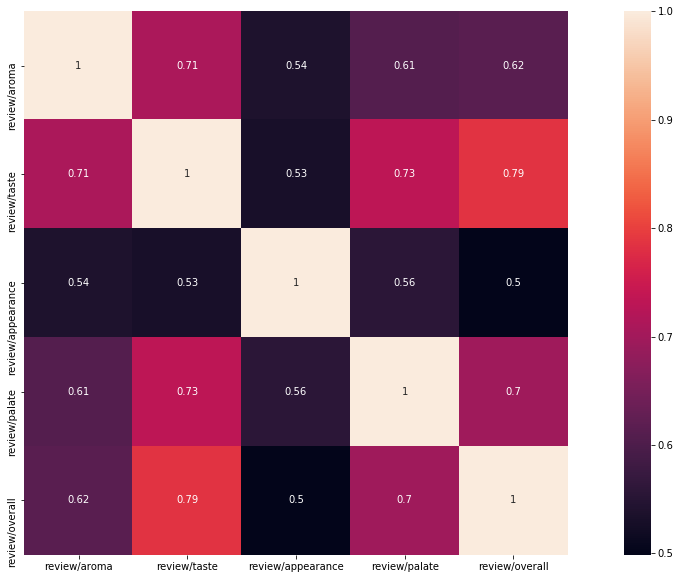

In [17]:
cormat = df_review.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(cormat,annot=True, square=True)

3. Which of the factors (aroma, taste, appearance, palate) are most important in determining the overall quality of a beer?

Base on the correlation matrix, we could see that "review/taste" has the most important in determining the "review/overall" because they have correlation value is 0.79

4. Lastly, if I typically enjoy a beer due to its aroma and appearance, which beer style should I try?

Let sort data by aroma and appearance

In [19]:
df_sort2= df.sort_values(['review/aroma','review/appearance'],ascending=False)
df_sort2.head()

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
71,17353,10.2,35036,1199,Founders Backwoods Bastard,Scotch Ale / Wee Heavy,5.0,5.0,5.0,5.0,5.0,I would surely consider myself a beer nut and ...,"{'min': 16, 'hour': 5, 'mday': 19, 'sec': 54, ...",1300511814,NaN,NaN,NaN,NaN,andrecrompton
83,15135,10.6,47658,1199,Founders CBS Imperial Stout,American Double / Imperial Stout,5.0,5.0,4.5,5.0,5.0,had this on tap at Brouwer's Big Wood Festival...,"{'min': 47, 'hour': 16, 'mday': 3, 'sec': 14, ...",1291394834,883404247.0,"Dec 14, 1986",534931200.0,Male,psiweaver
129,41605,6.6,1324,263,Aecht Schlenkerla Rauchbier Urbock,Rauchbier,5.0,5.0,4.0,4.0,4.5,This is my first beer of this style so hopeful...,"{'min': 7, 'hour': 7, 'mday': 1, 'sec': 47, 'y...",1151737667,NaN,NaN,NaN,NaN,TheBungyo
186,33520,11.2,19960,1199,Founders KBS (Kentucky Breakfast Stout),American Double / Imperial Stout,5.0,5.0,5.0,5.0,5.0,Ok.. These notes are from my experience in sav...,"{'min': 23, 'hour': 17, 'mday': 27, 'sec': 18,...",1317144198,994950247.0,"Jun 2, 1983",423385200.0,Male,hopking311
268,5163,9.4,33644,14879,B.O.R.I.S. The Crusher Oatmeal-Imperial Stout,Russian Imperial Stout,5.0,5.0,5.0,5.0,5.0,A: Thick tan head with beer being dark brown /...,"{'min': 39, 'hour': 16, 'mday': 28, 'sec': 1, ...",1227890341,NaN,NaN,NaN,NaN,TommyBuckeye


If you like aroma and appearance of beer, you could try with beer style "Scotch Ale / Wee Heavy", "American Double / Imperial Stout", "Rauchbier", etc.